<a href="https://colab.research.google.com/github/seong-eun822/setting/blob/main/%EB%A7%88%EC%BC%80%ED%8C%85%20campain%20mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

마케팅 캠페인 참여하는 고객의 특징 분석- 어떤 것과 상관관계가 큰지 확인 후 알고리즘 제작


In [ ]:
data=pd.read_excel('marketing_campaign.xlsx')


ID: 고객의 고유 식별자

Year_Birth: 고객님의 출생년도

Education: 고객의 교육 수준

Marital_Status: 고객의 결혼 상태

Income : 고객의 연간 가계 소득

Kidhome : 고객 가정의 자녀 수

Teenhome: 고객 가정의 청소년 수

Dt_Customer: 고객이 회사에 등록한 날짜

Recency: 고객의 마지막 구매 이후 일수

//



MntWines: 지난 2년간 와인에 쓴 금액

MntFruits: 지난 2년 동안 과일에 쓴 금액

MntMeatProducts: 지난 2년간 육류에 지출한 금액

MntFishProducts: 지난 2년간 생선에 지출한 금액

MntSweetProducts: 지난 2년간 과자에 쓴 금액

MntGoldProds: 지난 2년간 금에 사용된 금액

//

NumDealsPurchases: 할인된 구매 횟수

AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0

AcceptedCmp2: 고객이 2번째 캠페인에서 제안을 수락한 경우

AcceptedCmp3: 고객이 3번째 캠페인에서 제안을 수락한 경우

AcceptedCmp4: 고객이 4번째 캠페인에서 제안을 수락한 경우

AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우

Response: 고객이 마지막 캠페인에서 제안을 수락한 경우

//


Complain: 불만사향 (0: 불만사항 없음, 1: 불만 제기 경험 있음)


In [ ]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [ ]:
data['Response'].value_counts() #마지막 캠페인 제안 거절:0, 수락:1

,count
Response,
0,1906
1,334


In [ ]:
data['Total_Products'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts']
+ data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'] #구매한 총 제품 수 합

,0
0,348
1,9
2,174
3,18
4,88
...,...
2235,407
2236,8
2237,68
2238,171


In [ ]:
data['Total_Purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases']
+ data['NumCatalogPurchases'] + data['NumStorePurchases'] #구매 횟수 합산

,0
0,14
1,3
2,12
3,4
4,9
...,...
2235,7
2236,7
2237,16
2238,15


In [ ]:
data['Total_Complaints'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3']
+ data['AcceptedCmp4'] + data['AcceptedCmp5'] #참여한 마케팅 수 합산

,0
0,0
1,0
2,0
3,0
4,0
...,...
2235,0
2236,0
2237,1
2238,0


In [ ]:
data['Tot_Home'] = data['Kidhome'] + data['Teenhome']
data['Tot_Home']

,Tot_Home
0,0
1,2
2,0
3,1
4,1
...,...
2235,1
2236,3
2237,0
2238,1


In [ ]:
data['Age'] = 2024 - data['Year_Birth']
data['Age']

,Age
0,67
1,70
2,59
3,40
4,43
...,...
2235,57
2236,78
2237,43
2238,68


In [ ]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Products,Total_Purchases,Total_Complaints,Tot_Home,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,1269,11,0,0,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,18,3,0,2,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,602,9,0,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,35,4,0,1,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,334,10,0,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,934,11,0,1,57
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,436,15,1,3,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,1173,3,0,0,43
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,672,8,0,1,68


In [ ]:
data.drop(columns={
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'ID', 'Complain', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'
}, inplace=True)

In [ ]:
data

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Response,Total_Products,Total_Purchases,Total_Complaints,Tot_Home,Age
0,Graduation,Single,58138.0,58,7,1,1269,11,0,0,67
1,Graduation,Single,46344.0,38,5,0,18,3,0,2,70
2,Graduation,Together,71613.0,26,4,0,602,9,0,0,59
3,Graduation,Together,26646.0,26,6,0,35,4,0,1,40
4,PhD,Married,58293.0,94,5,0,334,10,0,1,43
...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,5,0,934,11,0,1,57
2236,PhD,Together,64014.0,56,7,0,436,15,1,3,78
2237,Graduation,Divorced,56981.0,91,6,0,1173,3,0,0,43
2238,Master,Together,69245.0,8,3,0,672,8,0,1,68


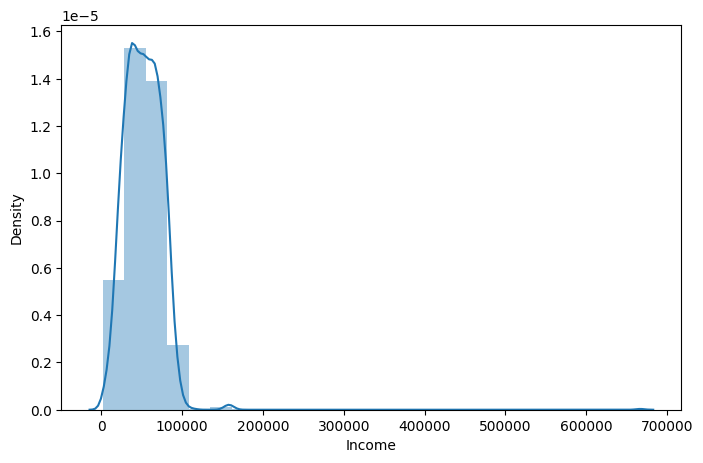

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 5))
sns.distplot(data['Income'], bins=25, hist=True, label="Income")
plt.show()

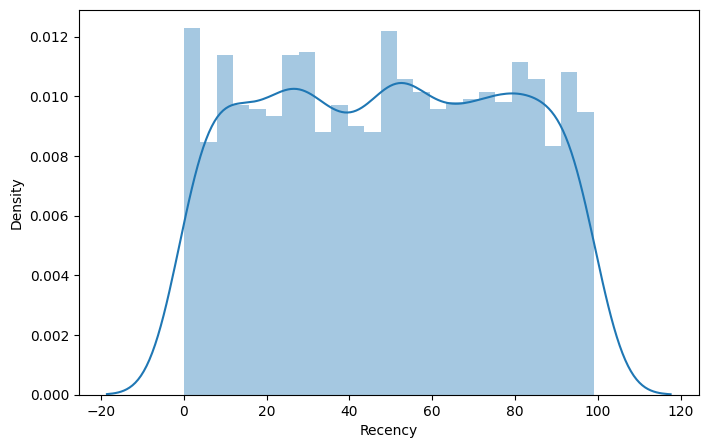

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Recency'], bins=25, hist=True, label="Recency")
plt.show()

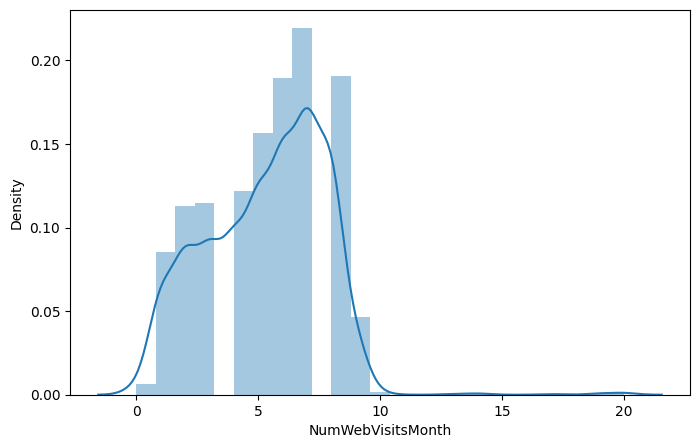

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(data['NumWebVisitsMonth'], bins=25, hist=True, label="NumWebVisitsMonth")
plt.show()

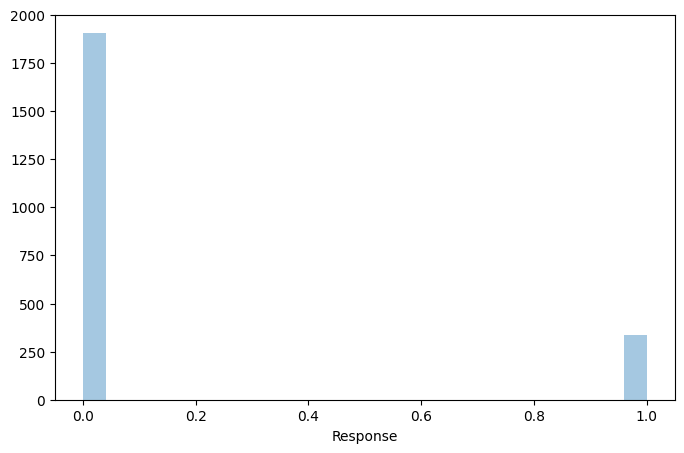

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Response'], bins=25, hist=True, kde=False ,label="Response")
plt.show()

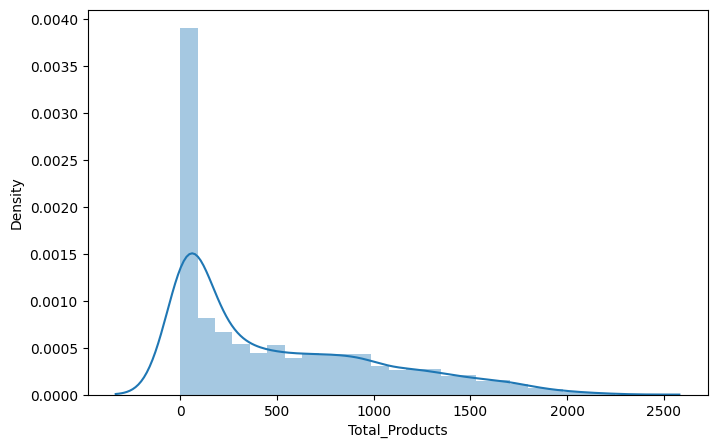

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Total_Products'], bins=25, hist=True, label="Total_Products")
plt.show()

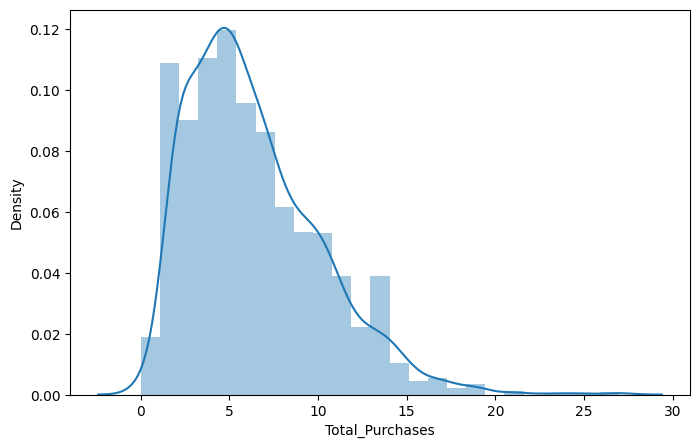

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Total_Purchases'], bins=25, hist=True, label="Total_Purchases")
plt.show()

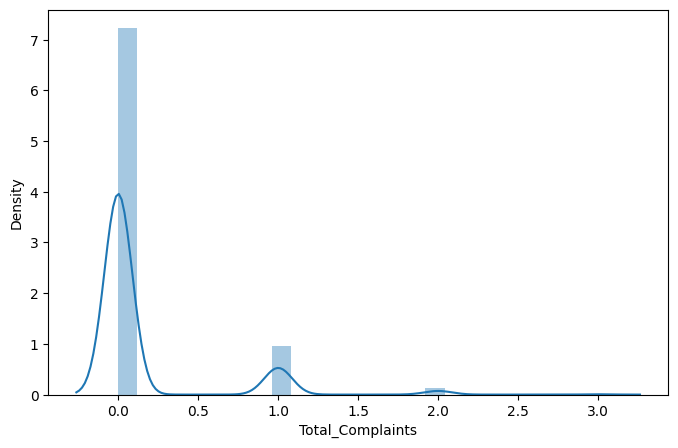

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Total_Complaints'], bins=25, hist=True, label="Total_Complaints")
plt.show()

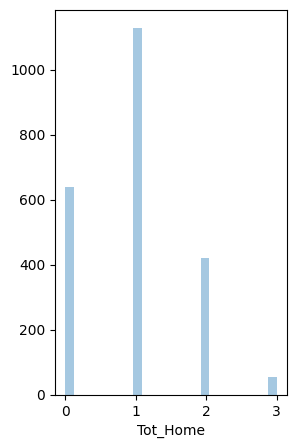

In [ ]:
plt.figure(figsize=(3, 5))
sns.distplot(data['Tot_Home'], bins=25, hist=True,  kde=False ,label="Tot_Home")
plt.show()

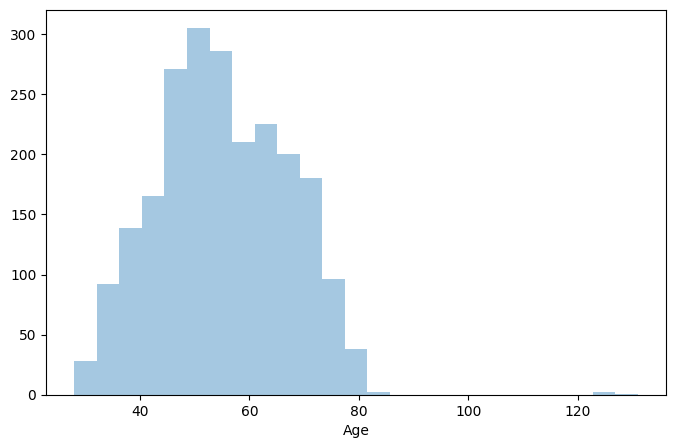

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Age'], bins=25, hist=True, kde=False ,label="Age")
plt.show()

<Axes: xlabel='Education', ylabel='count'>

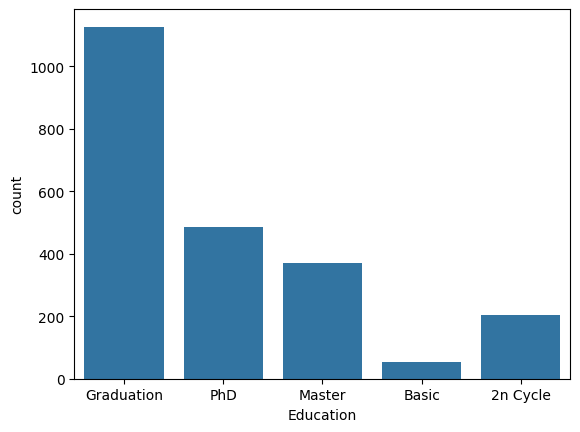

In [ ]:
sns.countplot(data=data,x='Education')

<Axes: xlabel='Marital_Status', ylabel='count'>

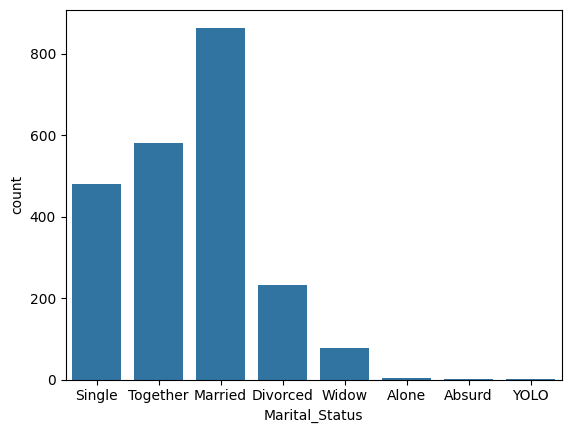

In [ ]:
sns.countplot(data=data,x='Marital_Status')

In [ ]:
data

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Response,Total_Products,Total_Purchases,Total_Complaints,Tot_Home,Age
0,Graduation,Single,58138.0,58,7,1,1269,11,0,0,67
1,Graduation,Single,46344.0,38,5,0,18,3,0,2,70
2,Graduation,Together,71613.0,26,4,0,602,9,0,0,59
3,Graduation,Together,26646.0,26,6,0,35,4,0,1,40
4,PhD,Married,58293.0,94,5,0,334,10,0,1,43
...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,5,0,934,11,0,1,57
2236,PhD,Together,64014.0,56,7,0,436,15,1,3,78
2237,Graduation,Divorced,56981.0,91,6,0,1173,3,0,0,43
2238,Master,Together,69245.0,8,3,0,672,8,0,1,68


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_edu = LabelEncoder()
label_encoder_marital = LabelEncoder()

data['Education_encoded'] = label_encoder_edu.fit_transform(data['Education'])
data['Marital_Status_encoded'] = label_encoder_marital.fit_transform(data['Marital_Status'])

In [ ]:
data[['Education', 'Education_encoded', 'Marital_Status', 'Marital_Status_encoded']]

,Education,Education_encoded,Marital_Status,Marital_Status_encoded
0,Graduation,2,Single,4
1,Graduation,2,Single,4
2,Graduation,2,Together,5
3,Graduation,2,Together,5
4,PhD,4,Married,3
...,...,...,...,...
2235,Graduation,2,Married,3
2236,PhD,4,Together,5
2237,Graduation,2,Divorced,2
2238,Master,3,Together,5


In [ ]:
data.drop(columns={'Education', 'Marital_Status'}, inplace=True)

<Axes: xlabel='Education_encoded', ylabel='count'>

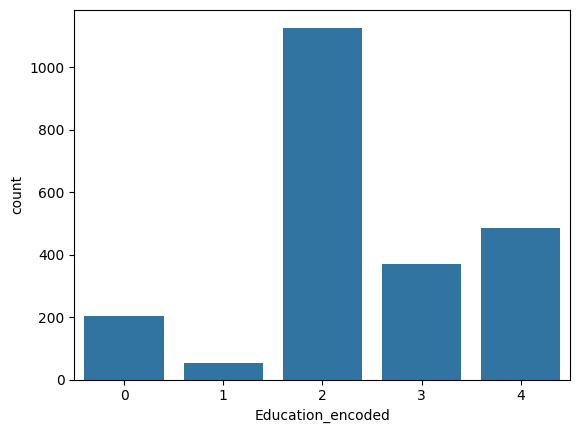

In [ ]:
sns.countplot(data=data,x='Education_encoded')

<Axes: xlabel='Marital_Status_encoded', ylabel='count'>

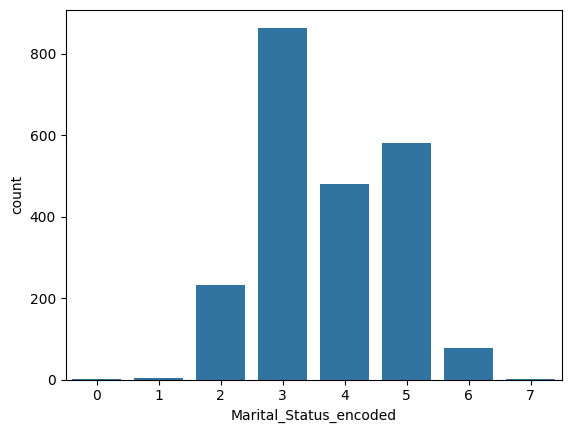

In [ ]:
sns.countplot(data=data,x='Marital_Status_encoded')

In [ ]:
data

,Income,Recency,NumWebVisitsMonth,Response,Total_Products,Total_Purchases,Total_Complaints,Tot_Home,Age,Education_encoded,Marital_Status_encoded
0,58138.0,58,7,1,1269,11,0,0,67,2,4
1,46344.0,38,5,0,18,3,0,2,70,2,4
2,71613.0,26,4,0,602,9,0,0,59,2,5
3,26646.0,26,6,0,35,4,0,1,40,2,5
4,58293.0,94,5,0,334,10,0,1,43,4,3
...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,5,0,934,11,0,1,57,2,3
2236,64014.0,56,7,0,436,15,1,3,78,4,5
2237,56981.0,91,6,0,1173,3,0,0,43,2,2
2238,69245.0,8,3,0,672,8,0,1,68,3,5


In [ ]:
data.columns

Index(['Income', 'Recency', 'NumWebVisitsMonth', 'Response', 'Total_Products',
       'Total_Purchases', 'Total_Complaints', 'Tot_Home', 'Age',
       'Education_encoded', 'Marital_Status_encoded'],
      dtype='object')

In [ ]:
cor=data.corr()
cor['Response'][cor['Response']> 0.08]

,Response
Income,0.132756
Response,1.000000
Total_Products,0.271661
Total_Purchases,0.111730
Total_Complaints,0.385559
Education_encoded,0.090819


In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
mx = MinMaxScaler()
col1 = ['Income', 'Total_Purchases', 'Total_Complaints', 'Total_Products']
for i in col1:
    data[i] = mx.fit_transform(data[[i]])

In [ ]:
df =data[['Education_encoded','Marital_Status_encoded', 'Income', 'Recency', 'NumWebVisitsMonth', 'Total_Products','Total_Purchases'
, 'Total_Complaints', 'Age', 'Response']]

In [ ]:
df.columns

Index(['Education_encoded', 'Marital_Status_encoded', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Total_Products', 'Total_Purchases',
       'Total_Complaints', 'Age', 'Response'],
      dtype='object')

In [ ]:
df

,Education_encoded,Marital_Status_encoded,Income,Recency,NumWebVisitsMonth,Total_Products,Total_Purchases,Total_Complaints,Age,Response
0,2,4,0.084832,58,7,0.565004,0.407407,0.000000,67,1
1,2,4,0.067095,38,5,0.008014,0.111111,0.000000,70,0
2,2,5,0.105097,26,4,0.268032,0.333333,0.000000,59,0
3,2,5,0.037471,26,6,0.015583,0.148148,0.000000,40,0
4,4,3,0.085065,94,5,0.148709,0.370370,0.000000,43,0
...,...,...,...,...,...,...,...,...,...,...
2235,2,3,0.089472,46,5,0.415850,0.407407,0.000000,57,0
2236,4,5,0.093669,56,7,0.194123,0.555556,0.333333,78,0
2237,2,2,0.083092,91,6,0.522262,0.111111,0.000000,43,0
2238,3,5,0.101536,8,3,0.299199,0.296296,0.000000,68,0


In [ ]:
df.corr()

,Education_encoded,Marital_Status_encoded,Income,Recency,NumWebVisitsMonth,Total_Products,Total_Purchases,Total_Complaints,Age,Response
Education_encoded,1.000000,0.007090,0.119974,-0.011728,-0.040281,0.136058,0.076442,0.003211,0.171390,0.090819
Marital_Status_encoded,0.007090,1.000000,0.021267,0.014159,-0.031210,0.018639,-0.012664,-0.022308,0.060580,-0.011403
Income,0.119974,0.021267,1.000000,-0.003946,-0.549824,0.655614,0.240379,0.179292,0.160942,0.132756
Recency,-0.011728,0.014159,-0.003946,1.000000,-0.021445,0.020036,-0.008542,-0.033034,0.019871,-0.198437
NumWebVisitsMonth,-0.040281,-0.031210,-0.549824,-0.021445,1.000000,-0.472759,0.138199,-0.078626,-0.121139,-0.003987
Total_Products,0.136058,0.018639,0.655614,0.020036,-0.472759,1.000000,0.342896,0.300395,0.116659,0.271661
Total_Purchases,0.076442,-0.012664,0.240379,-0.008542,0.138199,0.342896,1.000000,0.044976,0.139286,0.111730
Total_Complaints,0.003211,-0.022308,0.179292,-0.033034,-0.078626,0.300395,0.044976,1.000000,-0.033857,0.385559
Age,0.171390,0.060580,0.160942,0.019871,-0.121139,0.116659,0.139286,-0.033857,1.000000,-0.021325
Response,0.090819,-0.011403,0.132756,-0.198437,-0.003987,0.271661,0.111730,0.385559,-0.021325,1.000000


In [ ]:
X = df.iloc[:,0:7]
Y = df.iloc[:,-1]

In [ ]:
X,Y

(      Education_encoded  Marital_Status_encoded    Income  Recency  \
 0                     2                       4  0.084832       58   
 1                     2                       4  0.067095       38   
 2                     2                       5  0.105097       26   
 3                     2                       5  0.037471       26   
 4                     4                       3  0.085065       94   
 ...                 ...                     ...       ...      ...   
 2235                  2                       3  0.089472       46   
 2236                  4                       5  0.093669       56   
 2237                  2                       2  0.083092       91   
 2238                  3                       5  0.101536        8   
 2239                  4                       3  0.076908       40   
 
       NumWebVisitsMonth  Total_Products  Total_Purchases  
 0                     7        0.565004         0.407407  
 1                     5  

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5, random_state = 42)

In [ ]:
X_train

,Education_encoded,Marital_Status_encoded,Income,Recency,NumWebVisitsMonth,Total_Products,Total_Purchases
1177,2,3,0.079190,8,3,0.161175,0.185185
984,2,3,0.118858,17,3,0.422974,0.222222
1769,3,3,0.069297,30,7,0.066785,0.185185
140,3,4,0.137049,46,2,0.865539,0.222222
1764,0,3,0.030416,81,6,0.005788,0.148148
...,...,...,...,...,...,...,...
1638,2,3,0.063687,17,5,0.015583,0.148148
1095,2,4,0.090377,56,4,0.138914,0.185185
1130,3,3,0.098733,67,7,0.390027,0.222222
1294,4,4,0.070966,21,4,0.027159,0.111111


In [ ]:
Y_train

,Response
1177,0
984,1
1769,0
140,0
1764,0
...,...
1638,0
1095,0
1130,0
1294,0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

model.summary()

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5640 - loss: 2.7118 - val_accuracy: 0.8348 - val_loss: 0.9318
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7881 - loss: 1.0377 - val_accuracy: 0.8304 - val_loss: 0.5934
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7488 - loss: 0.9430 - val_accuracy: 0.8304 - val_loss: 0.4584
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 1.0585 - val_accuracy: 0.8348 - val_loss: 0.4557
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8231 - loss: 0.6264 - val_accuracy: 0.8348 - val_loss: 0.4068
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8006 - loss: 0.5514 - val_accuracy: 0.8348 - val_loss: 0.4296
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - loss: 0.5076 - val_accuracy: 0.8348 - val_loss: 0.4410
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.5550 - val_accuracy: 0.8348 - val_loss:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (32, 64)                    │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 32)                    │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (32, 32)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (32, 1)                     │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,877 (30.77 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,252 (20.52 KB)

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8455 - loss: 0.4117 
Loss: 0.39167073369026184, Accuracy: 0.8580357432365417


In [ ]:
y_pred = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


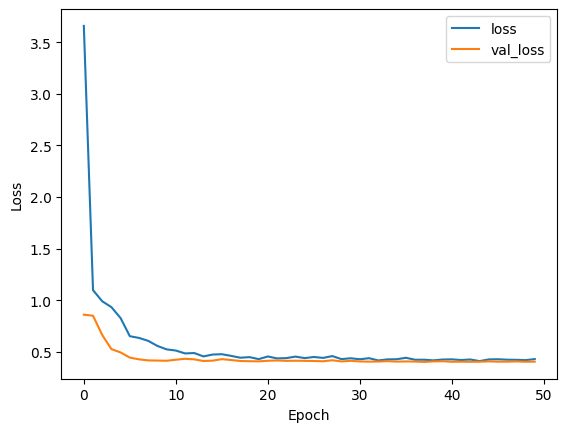

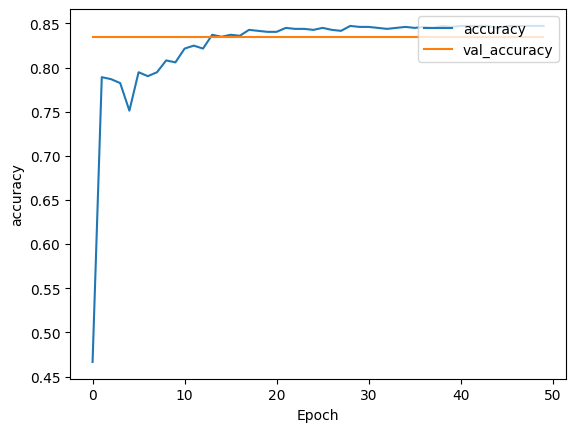

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper right')
plt.show()

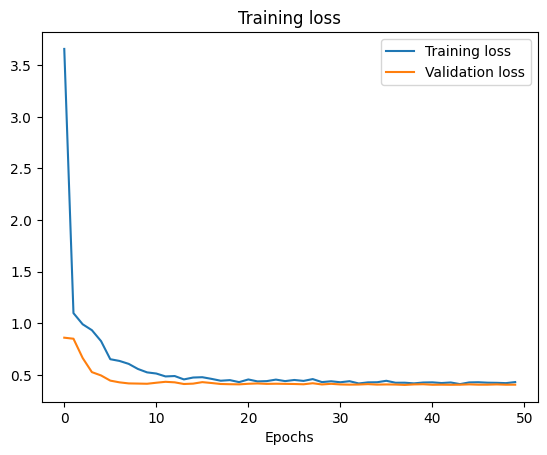

In [ ]:
history_dict = history.history
loss = history_dict['loss']

plt.plot(loss, label='Training loss')
plt.plot(history_dict['val_loss'], label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.3470274242377456